In [3]:
import sys
print(sys.version)
import json
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt


3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]


In [292]:
# TODO: Choose color palette https://seaborn.pydata.org/tutorial/color_palettes.html
kit_blue_1 = "#4664AA"
kit_blue_2 = "#7D92C3"
# TODO: Figure aesthetics https://seaborn.pydata.org/tutorial/aesthetics.html

sns.set(color_codes=True)

run = "writtenwork_depth"
res = pd.read_csv(f"out/_results_{run}.csv", index_col=0)
classes = list(res.index.values)

res

n_t     n_b        m_g    dens_g        k_t  \
WrittenWork           90862.0  6235.0  1430486.0  0.002525  15.743501   
Comic                  6688.0   996.0   123468.0  0.018535  18.461124   
Manga                  3783.0   459.0    81038.0  0.046670  21.421623   
PeriodicalLiterature  22235.0  1743.0   368326.0  0.009504  16.565145   
AcademicJournal        7688.0   561.0   174820.0  0.040534  22.739334   
Magazine               6728.0  1011.0   102287.0  0.015038  15.203181   
Newspaper              8060.0   958.0    97900.0  0.012679  12.146402   

                             k_b           m_t    dens_t        k_t_om  \
WrittenWork           229.428388  2.887892e+09  0.699602  63569.341786   
Comic                 123.963855  2.005113e+07  0.896688   5996.151017   
Manga                 176.553377  7.022957e+06  0.981730   3712.903516   
PeriodicalLiterature  211.317269  2.134585e+08  0.863552  19202.811443   
AcademicJournal       311.622103  2.839328e+07  0.960894   7387.351112   
Magazine              101.174085  1.885800e+07  0.833332   5605.827586   
Newspaper             102.192067  2.741099e+07  0.843992   6805.111221   

                           m_b    dens_b     k_b_om  rc_t_dens  rc_t_ncomp  \
WrittenWork           289775.0  0.014910  92.951083   0.000549         NaN   
Comic                  30932.0  0.062425  62.112450   0.006494    0.017903   
Manga                  11965.0  0.113832  52.135076   0.026932    0.045602   
PeriodicalLiterature   46922.0  0.030907  53.871412   0.002974         NaN   
AcademicJournal        13269.0  0.084473  47.389286   0.026015         NaN   
Magazine               24330.0  0.047654  48.130564   0.006348    0.014457   
Newspaper              19522.0  0.042587  40.798328   0.005747    0.012682   

                      rc_t_slcc  rc_b_dens  rc_b_ncomp  rc_b_slcc  
WrittenWork                 NaN   0.000008    0.002261   0.002239  
Comic                  0.017125   0.000417    0.017248   0.017192  
Manga                  0.045571   0.002567    0.044223   0.044165  
PeriodicalLiterature        NaN   0.000112    0.009267   0.008647  
AcademicJournal             NaN   0.001846    0.040222   0.038316  
Magazine               0.014312   0.000269    0.013745   0.013649  
Newspaper              0.012142   0.000192    0.012435   0.011292

90858 nodes with degree >= 1 and 4.0 disconnected nodes


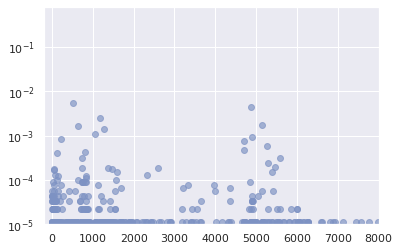

In [4]:
class1 = classes[0]
with open(f"out/{class1}/{class1}.t.k.json", "r") as input_file:
    dist = json.load(input_file)

nnodes = 0
for key, value in dist.items():
    nnodes += value

n_t = res.loc[class1, "n_t"]
ndiscnodes = n_t - nnodes

x = []
y = []
for key, value in dist.items():
    x.append(int(key))
    y.append(float(value / nnodes))
    
print(f"{nnodes} nodes with degree >= 1 and {ndiscnodes} disconnected nodes")
x.append(0)
y.append(float(ndiscnodes / nnodes))

# plt.xscale("log")
plt.xlim(-200, 8000)
plt.yscale("log")
plt.ylim(0.00001, 0.8)
plt.scatter(x, y, color=MAIN_COLOR_2+"aa")

6235 nodes with degree >= 1 and 0.0 disconnected nodes


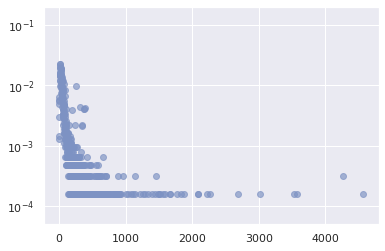

In [6]:
with open(f"out/{classes[0]}/{classes[0]}.b.k.json", "r") as input_file:
    dist = json.load(input_file)

nnodes = 0
for key, value in dist.items():
    nnodes += value

n_b = res.loc[classes[0], "n_b"]
ndiscnodes = n_b - nnodes

x = []
y = []
for key, value in dist.items():
    x.append(int(key))
    y.append(float(value / nnodes))
    
print(f"{nnodes} nodes with degree >= 1 and {ndiscnodes} disconnected nodes")
x.append(0)
y.append(float(ndiscnodes / nnodes))

# plt.xscale("log")
# plt.xlim(0.5, 50000)
plt.yscale("log")
plt.ylim(0.00005, 0.2)
plt.scatter(x, y, color=MAIN_COLOR_2+"aa")
plt.show()

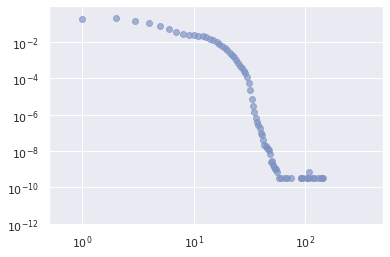

In [5]:
with open(f"out/{classes[0]}/{classes[0]}.t.w.json", "r") as input_file:
    dist = json.load(input_file)

nnodes = 0
for key, value in dist.items():
    if int(key) > 0:
        nnodes += value

x = []
y = []
for key, value in dist.items():
    if int(key) > 0:
        x.append(int(key))
        y.append(float(value / nnodes))

plt.xscale("log")
plt.xlim(0.5, 500)
plt.yscale("log")
plt.ylim(0.000000000001, 0.9)
plt.scatter(x, y, color=MAIN_COLOR_2+"aa")
plt.show()

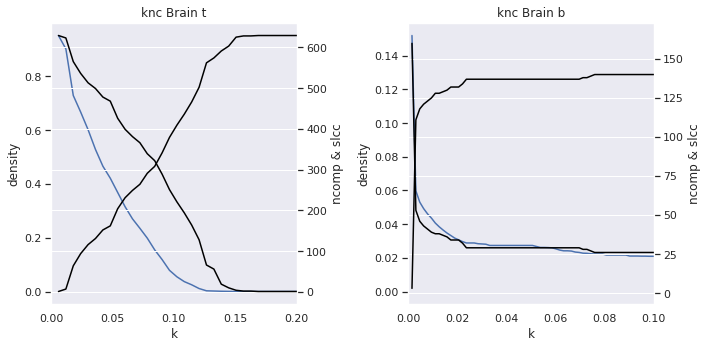

In [78]:
class1 = classes[3]

df_t = pd.read_csv(f"out/{class1}/{class1}.t.knc.csv", index_col=0)
df_b = pd.read_csv(f"out/{class1}/{class1}.b.knc.csv", index_col=0)

n_t = res.loc[class1, "n_t"]
n_b = res.loc[class1, "n_b"]
k_max_t = n_b
k_max_b = n_t
# w_max_t = 50


# knc_density = df["density"]
# knc_ncomponents = df["ncomponents"] # (n_t - df["ncomponents"]) / (n_t - 1)
# knc_slcc = df["slcc"] # (df["slcc"] - 1) / (n_t - 1)
# plt.xlim(0, w_max_t/k_max_t)
# plt.ylim(0, 1)
# plt.bar(df["k"]/k_max_t, knc_ncomponents, width=1/k_max_t, align="edge", color=MAIN_COLOR_1, edgecolor=MAIN_COLOR_2)

# plt.bar(df["k"]/k_max_t, knc_slcc, width=1/k_max_t, align="edge", color=MAIN_COLOR_1, edgecolor=MAIN_COLOR_2)
# ax = df["ncomponents"].plot()
# df["slcc"].plot(ax=ax)

df_t.index = df_t.index / k_max_t # Normalize k axis
df_b.index = df_b.index / k_max_b
# barwidth = 1 / k_max_t

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
try:
    df_t["density"].plot(ax=ax1, color="b", title=f"knc {class1} t") # .bar(width=barwidth, align="center") # kind="bar" # bar width not scaling with xlim
    df_t["ncomponents"].plot(ax=ax1, color="#000000", secondary_y=True)
    df_t["slcc"].plot(ax=ax1, color="#000000", secondary_y=True)
    ax1.right_ax.set_ylabel("ncomp & slcc")
except KeyError as e:
    print(classname, e)
ax1.set_xlim(0, 0.2)
ax1.set_ylabel("density")

try:
    df_b["density"].plot(ax=ax2, color="b", title=f"knc {class1} b") # .bar(width=barwidth, align="center") # kind="bar" # bar width not scaling with xlim
    df_b["ncomponents"].plot(ax=ax2, color="#000000", secondary_y=True)
    df_b["slcc"].plot(ax=ax2, color="#000000", secondary_y=True)
    ax2.right_ax.set_ylabel("ncomp & slcc")
except KeyError as e:
    print(classname, e)
ax2.set_xlim(0, 0.1)
ax2.set_ylabel("density")

fig.tight_layout() # plt.subplots_adjust(wspace=1)

Vein 'ncomponents'


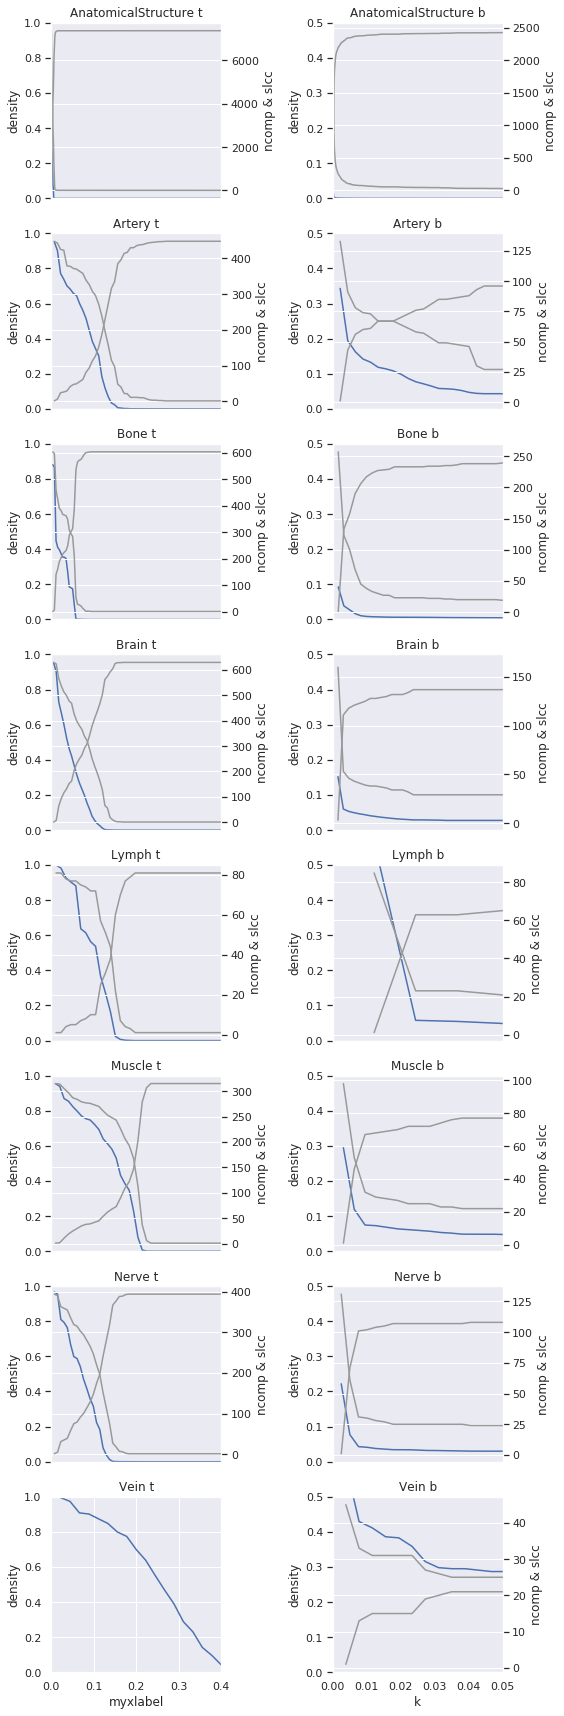

In [125]:
# KNC plots for each superclass and its subclasses

fig, axes = plt.subplots(len(classes), 2, figsize=(8, 3 * len(classes)))

for classname in classes:
    try:
        df_t = pd.read_csv(f"out/{classname}/{classname}.t.knc.csv", index_col=0)
        df_b = pd.read_csv(f"out/{classname}/{classname}.b.knc.csv", index_col=0)
    except FileNotFoundError as e:
        print(classname, e)

    n_t = res.loc[classname, "n_t"]
    n_b = res.loc[classname, "n_b"]

    df_t.index = df_t.index / n_b # Normalize k axis
    df_b.index = df_b.index / n_t

    axnr = classes.index(classname)
    df_t["density"].plot(x="k", ax=axes[axnr][0], color="b", title=f"{classname} t") # .bar(width=barwidth, align="center") # bar width not scaling with xlim
    axes[axnr][0].set_xlabel("myxlabel") # TODO: pandas issue, some xlables not showing
    try:
        df_t["ncomponents"].plot(ax=axes[axnr][0], color="#999999", secondary_y=True)
        df_t["slcc"].plot(ax=axes[axnr][0], color="#999999", secondary_y=True)
        axes[axnr][0].right_ax.set_ylabel("ncomp & slcc")
    except KeyError as e:
        print(classname, e)
    axes[axnr][0].set_xlim(0, 0.4)
    axes[axnr][0].set_ylim(0, 1)
    axes[axnr][0].set_ylabel("density")

    df_b["density"].plot(ax=axes[axnr][1], color="b", title=f"{classname} b") # .bar(width=barwidth, align="center") # bar width not scaling with xlim
    try:
        df_b["ncomponents"].plot(ax=axes[axnr][1], color="#999999", secondary_y=True)
        df_b["slcc"].plot(ax=axes[axnr][1], color="#999999", secondary_y=True)
        axes[axnr][1].right_ax.set_ylabel("ncomp & slcc")
    except KeyError as e:
        print(classname, e)
    axes[axnr][1].set_xlim(0, 0.05)
    axes[axnr][1].set_ylim(0, 0.5)
    axes[axnr][1].set_ylabel("density")

# plt.subplots_adjust(wspace=1, hspace=1)
# fig.tight_layout()
plt.tight_layout()
# plt.savefig("test.png",bbox_inches='tight')

<BarContainer object of 459 artists>

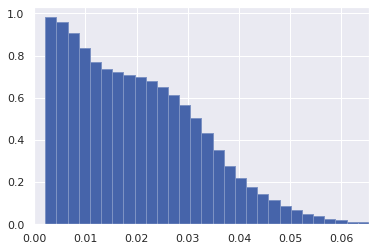

In [7]:
# Single KNC plot of a specific class

class1 = classes[2]
df = pd.read_csv(f"out/{class1}/{class1}.t.knc.csv")

n_t = res.loc[class1, "n_t"]
n_b = res.loc[class1, "n_b"]
k_max_t = n_b
w_max_t = 30

knc_density = df["density"]
# knc_ncomponents = (n_b - df["ncomponents"]) / (n_b - 1)
# knc_slcc = (df["slcc"] - 1) / (n_b -1)

plt.xlim(0, w_max_t/k_max_t)
# plt.ylim(0, 1)
plt.bar(df["k"]/k_max_t, knc_density, width=1/k_max_t, align="edge", color=MAIN_COLOR_1, edgecolor=MAIN_COLOR_2)


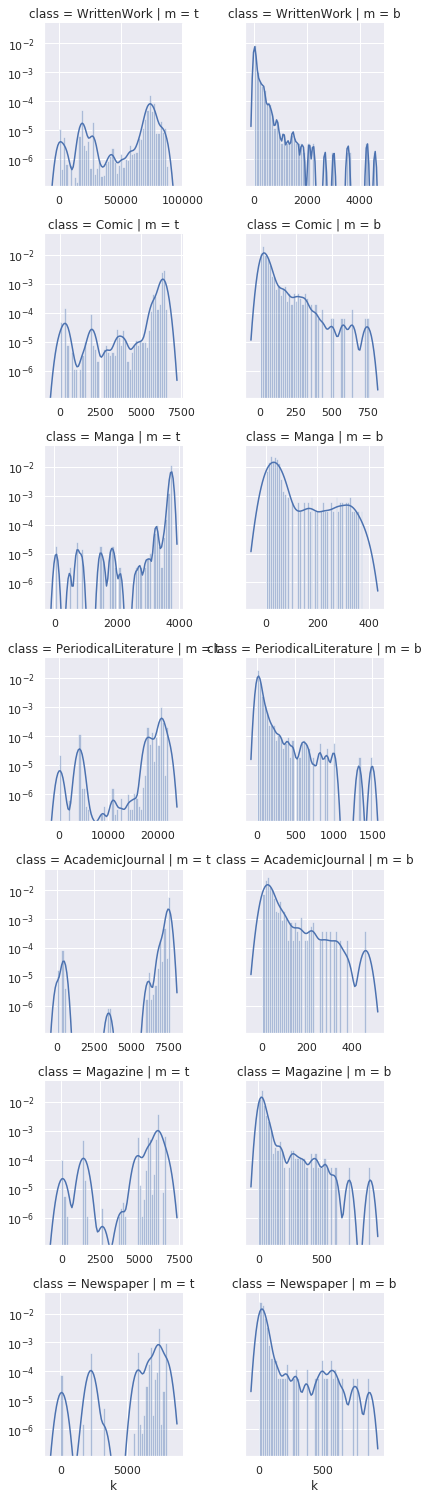

In [8]:
# Degree distribution of top and bot onemode graphs
c = []
m = []
k = []
for classname in classes:
    with open(f"out/{classname}/{classname}.t.k.json", "r") as input_file:
        dist = json.load(input_file)
    for key, value in dist.items():
        for _ in range(0, value):
            c.append(classname)
            m.append("t")
#             k_max = res.
            k.append(int(key))
    with open(f"out/{classname}/{classname}.b.k.json", "r") as input_file:
        dist = json.load(input_file)
    for key, value in dist.items():
        for _ in range(0, value):
            c.append(classname)
            m.append("b")
            k.append(int(key))
#TODO: Normalize x axis
            
dct = {"class": c, "m": m, "k": k}
df = pd.DataFrame(dct)

fg = sns.FacetGrid(df, row="class", col="m", sharex=False)
fg.map(sns.distplot, "k")
fg.set(yscale="log")

n_t     n_b
AnatomicalStructure  7373.0  2458.0
Artery                449.0   134.0
Bone                  604.0   257.0
Brain                 632.0   166.0
Lymph                  82.0    86.0
Muscle                315.0    98.0
Nerve                 394.0   131.0
Vein                  257.0    45.0


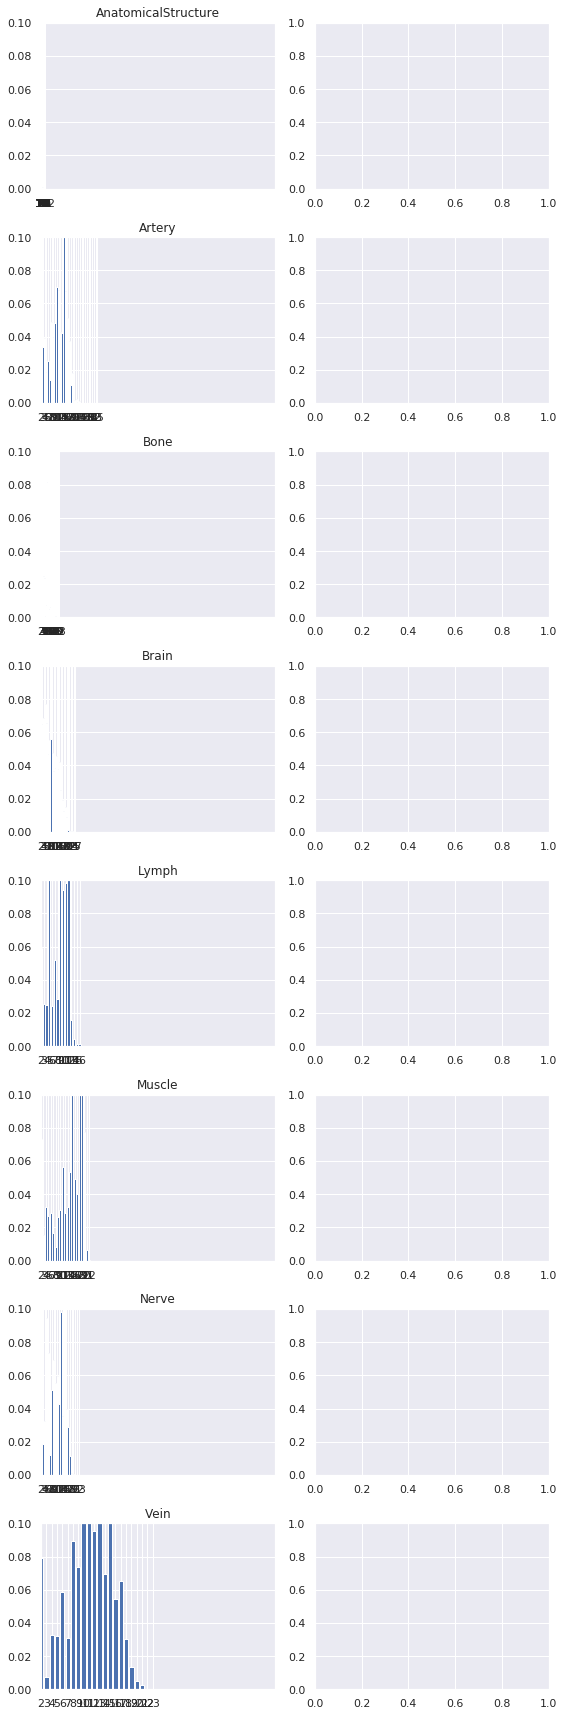

In [135]:
# Weight distribution of top and bot onemode graphs
print(res[["n_t", "n_b"]])
fig, axes = plt.subplots(len(classes), 2, figsize=(8, 3 * len(classes)))
for classname in classes:
    axnr = classes.index(classname)
    m_t = res.loc[classname, "m_t"]    
    w_max_t = res.loc[classname, "n_b"]
    w = []
    pw = []
    with open(f"out/{classname}/{classname}.t.w.json", "r") as input_file:
        dist = json.load(input_file)
    for key, value in dist.items():
        if int(key) > 0:
            w.append(key)
            pw.append(value / m_t)
    axes[axnr][0].set_xlim(1, w_max_t) #axis(xmin=1,xmax=w_max_t) # TODO: Set xlim
    axes[axnr][0].set_ylim(0, 0.1)
    axes[axnr][0].set_title(classname)
    axes[axnr][0].bar(w, pw, align='center')

# plt.tick_params(axis='x', which='minor', labelsize=0.5)
plt.tight_layout()

n_t 5, n_b 4, m 10


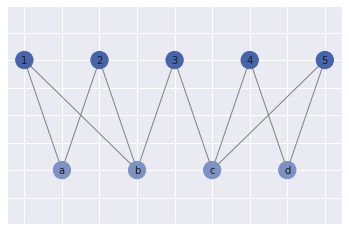

In [96]:
# Example bipartite graphs
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5], bipartite=0)
G.add_nodes_from(["a", "b", "c", "d"], bipartite=1)
# Full connected graph
# G.add_edges_from([(1,"a"),(1,"b"),(1,"c"),(1,"d"),
#                     (2,"a"),(2,"b"),(2,"c"),(2,"d"),
#                     (3,"a"),(3,"b"),(3,"c"),(3,"d"),
#                     (4,"a"),(4,"b"),(4,"c"),(4,"d"),
#                     (5,"a"),(5,"b"),(5,"c"),(5,"d")])
# FiveFour graph
# G.add_edges_from([(1,"a"),(1,"b"),(1,"c"),
#                     (2,"a"),(2,"b"),(2,"c"),
#                     (3,"a"),(3,"b"),(3,"c"),(3,"d"),
#                     (4,"b"),(4,"c"),
#                     (5,"d")])
# Disconnected graph
# G.add_edges_from([(1,"a"),
#                     (2,"b"),
#                     (3,"c"),
#                     (4,"d")])
# 2 Cluster graph
G.add_edges_from([(1,"a"),(1,"b"),
                    (2,"a"),(2,"b"),
                    (3,"b"),(3,"c"),
                    (4,"c"),(4,"d"),
                    (5,"c"),(5,"d")])
top = [1, 2, 3, 4, 5] # top, bot = nx.bipartite.sets(G)
bot = ["a", "b", "c", "d"]
color_dict = {0: kit_blue_1, 1: kit_blue_2}
color_list = [color_dict[i[1]] for i in G.nodes.data("bipartite")]
print(f"n_t {len(top)}, n_b {len(bot)}, m {G.number_of_edges()}")

# bi_layout = nx.bipartite_layout(G, top, align="horizontal", aspect_ratio=20, scale=1)
# nx.draw_networkx(G, bi_layout, font_size=10, edge_color="grey", node_color=color_list)

bot_len = len(bot)
pos = dict()
pos.update((n, (i, 1.1)) for i, n in enumerate(top))
pos.update((n, (i + 0.5, 1)) for i, n in enumerate(bot))
nx.draw_networkx(G, pos=pos, font_size=10, edge_color="grey", node_color=color_list)

{(1, 2): Text(0.654508480212244, 0.4755283023511464, '3'),
 (1, 3): Text(0.09549145273252935, 0.2938926212887637, '3'),
 (1, 4): Text(0.09549151233717518, -0.2938926630120157, '2'),
 (2, 3): Text(-0.2500000670552266, 0.7694208997980517, '3'),
 (2, 4): Text(-0.2500000074505807, 0.1816356154972723, '2'),
 (3, 4): Text(-0.8090170349302954, -6.55651103964594e-08, '2'),
 (3, 5): Text(-0.24999999254941926, -0.18163562741820138, '1')}

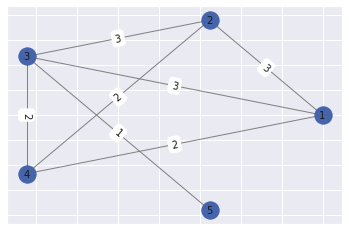

In [121]:
# Example onemode graphs
G = nx.Graph()
# Top mode
# FiveFour graph
G.add_nodes_from([1, 2, 3, 4, 5])
G.add_weighted_edges_from([(1,2,3),(1,3,3),(1,4,2),
                            (2,3,3),(2,4,2),
                            (3,4,2),(3,5,1)])

nx.draw_networkx(G, pos=nx.circular_layout(G, scale=1), font_size=10, edge_color="grey", node_color=kit_blue_1)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=nx.circular_layout(G, scale=1), edge_labels=labels, font_size=10)

# Full connected graph
# G.add_edges_from([(1,"a"),(1,"b"),(1,"c"),(1,"d"),
#                     (2,"a"),(2,"b"),(2,"c"),(2,"d"),
#                     (3,"a"),(3,"b"),(3,"c"),(3,"d"),
#                     (4,"a"),(4,"b"),(4,"c"),(4,"d"),
#                     (5,"a"),(5,"b"),(5,"c"),(5,"d")])

# Disconnected graph
# G.add_edges_from([(1,"a"),
#                     (2,"b"),
#                     (3,"c"),
#                     (4,"d")])
# 2 Cluster graph
# G.add_edges_from([(1,"a"),(1,"b"),
#                     (2,"a"),(2,"b"),
#                     (3,"b"),(3,"c"),
#                     (4,"c"),(4,"d"),
#                     (5,"c"),(5,"d")])

# G.add_nodes_from(["a", "b", "c", "d"])

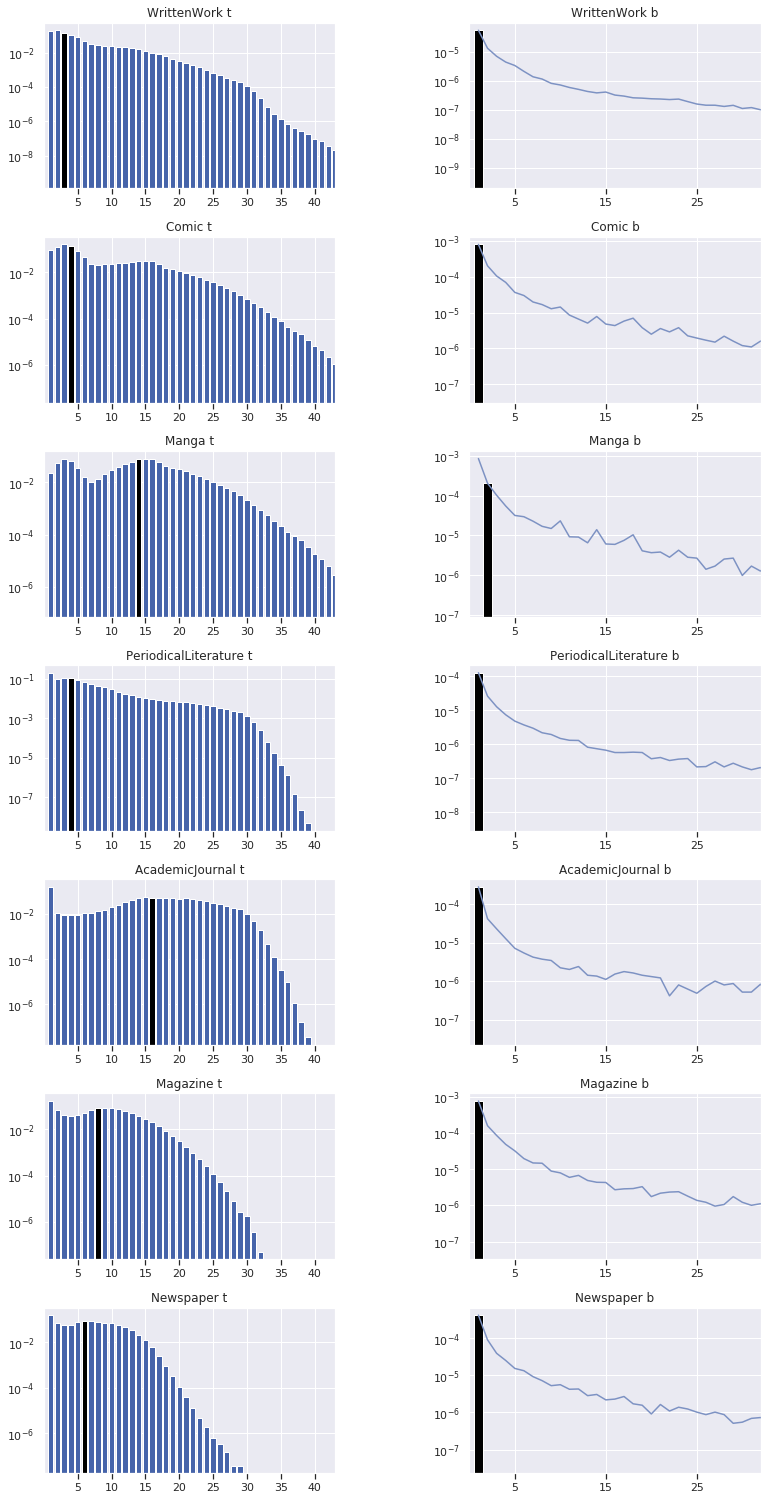

In [300]:
# Weight distribution of top and bot onemode graphs

def get_quantile(quant, dist, n):
    i = n * quant
    counter = 0
    for key, value in dist.items():
        if int(key) > 0:
            counter = counter + value
            if counter >= i:
                return int(key)
    return 1

fig, axes = plt.subplots(nrows=len(classes), ncols=2, sharex="col", sharey="none", figsize=(12, 3 * len(classes)))
xlim_t = []
xlim_b = []
for classname in classes:
    row = classes.index(classname)
    # Top
    w = []
    pw = []
    median_height = 0
    m_t = res.loc[classname, "m_t"]
    with open(f"out/{classname}/{classname}.t.w.json", "r") as input_file:
        dist = json.load(input_file)
    median = get_quantile(0.5, dist, m_t)
    xlim_t.append(get_quantile(0.99999, dist, m_t))
    for key, value in dist.items():
        if int(key) > 0:
            w.append(key)
            pw.append(value / m_t)
            if int(key) == median:
                median_height = value / m_t
    axes[row, 0].bar(w, pw, align='center', color=kit_blue_1)
    axes[row, 0].bar([median - 1], [median_height], align='center', color="black")
    axes[row, 0].set_title(classname + " t")
    axes[row, 0].set_yscale("log")
    axes[row, 0].tick_params(axis="x", reset=True, top=False)
    axes[row, 0].set_xticks(range(4, 100, 5))
    axes[row, 0].set_xticklabels(range(5, 100, 5))
    # Bot
    w = []
    pw = []
    median_height = 0
    m_b = res.loc[classname, "m_b"]
    with open(f"out/{classname}/{classname}.b.w.json", "r") as input_file:
        dist = json.load(input_file)
    median = get_quantile(0.5, dist, m_b)
    xlim_b.append(get_quantile(0.85, dist, m_b))
    for key, value in dist.items():
        if int(key) > 0:
            w.append(key)
            pw.append(value / m_t)
            if int(key) == median:
                median_height = value / m_t
    axes[row, 1].plot(w, pw, color=kit_blue_2)
    axes[row, 1].bar([median - 1], [median_height], align='center', color="black", width=1)
    axes[row, 1].set_title(classname + " b")
    axes[row, 1].set_yscale("log")
    axes[row, 1].tick_params(axis="x", reset=True, top=False)
    axes[row, 1].set_xticks(range(4, 500, 10))
    axes[row, 1].set_xticklabels(range(5, 500, 10))

axes[0, 0].set_xlim(-1, max(xlim_t))
axes[0, 1].set_xlim(-1, max(xlim_b))
plt.subplots_adjust(wspace=100)
plt.tight_layout()